<a href="https://colab.research.google.com/github/Kollaramaheshwarrao/Niyati/blob/main/niyati_ai_carreer_recomendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install -q scikit-learn


import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


file_path = "/content/career_dataset.csv"
df = pd.read_csv(file_path)
df.head()


,Skills,Interests,Education,Career
0,Java,Gaming,BSc,Content Writer
1,Excel,Finance,BTech,Accountant
2,Python,Finance,MSc,Digital Marketer
3,Photoshop,Gaming,MBA,Web Developer
4,SQL,Data,MBA,Data Analyst


In [ ]:
# 🎯 Label Encoding
le_skill = LabelEncoder()
le_interest = LabelEncoder()
le_education = LabelEncoder()
le_career = LabelEncoder()

df['Skills'] = le_skill.fit_transform(df['Skills'])
df['Interests'] = le_interest.fit_transform(df['Interests'])
df['Education'] = le_education.fit_transform(df['Education'])
df['Career'] = le_career.fit_transform(df['Career'])

# 🧠 Split features and label
X = df[['Skills', 'Interests', 'Education']]
y = df['Career']


In [ ]:
model = RandomForestClassifier()
model.fit(X, y)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [ ]:
def predict_career(skill, interest, education):
    try:
        s = le_skill.transform([skill])[0]
        i = le_interest.transform([interest])[0]
        e = le_education.transform([education])[0]

        pred = model.predict([[s, i, e]])
        career = le_career.inverse_transform(pred)[0]

        return f"🎯 Recommended Career: {career}"
    except Exception as e:
        return f"❌ Error: {str(e)}"


In [ ]:
# ✅ Sample Prediction
predict_career("Python", "AI", "BTech")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'🎯 Recommended Career: Data Scientist'

In [ ]:
# 📦 Install Gradio & Scikit-learn
!pip install -q gradio scikit-learn

# 🧠 Import Libraries
import pandas as pd
import gradio as gr
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 📂 Load your uploaded dataset
df = pd.read_csv("/content/career_dataset.csv")

# 🔄 Label Encoding
le_skill = LabelEncoder()
le_interest = LabelEncoder()
le_education = LabelEncoder()
le_career = LabelEncoder()

df['Skills'] = le_skill.fit_transform(df['Skills'])
df['Interests'] = le_interest.fit_transform(df['Interests'])
df['Education'] = le_education.fit_transform(df['Education'])
df['Career'] = le_career.fit_transform(df['Career'])

# 🎯 Split Data
X = df[['Skills', 'Interests', 'Education']]
y = df['Career']

# 🏗️ Train Model
model = RandomForestClassifier()
model.fit(X, y)


RandomForestClassifier()

In [ ]:
def recommend_career(skill, interest, education):
    try:
        s = le_skill.transform([skill])[0]
        i = le_interest.transform([interest])[0]
        e = le_education.transform([education])[0]
        pred = model.predict([[s, i, e]])
        return f"🚀 Recommended Career: {le_career.inverse_transform(pred)[0]}"
    except Exception as e:
        return f"❌ Error: {str(e)}"


In [ ]:
with gr.Blocks(theme=gr.themes.Soft(primary_hue="purple", secondary_hue="blue")) as demo:
    gr.Markdown("""
        <div style="text-align: center; font-size: 30px; font-weight: bold;">
            🔮 AI-Based Career Recommendation System
        </div>
        <div style="text-align: center; font-size: 16px; color: gray;">
            Let AI decide your ideal career based on your skills, interests & education 🚀
        </div>
        <br>
    """)

    with gr.Row():
        skill = gr.Dropdown(choices=le_skill.classes_.tolist(), label="🛠️ Select Your Skill")
        interest = gr.Dropdown(choices=le_interest.classes_.tolist(), label="💡 Select Your Interest")
        education = gr.Dropdown(choices=le_education.classes_.tolist(), label="🎓 Select Your Education")

    recommend_button = gr.Button("🔎 Recommend My Career", variant="primary")

    output = gr.Textbox(label="🎯 AI Recommendation", lines=2)

    recommend_button.click(fn=recommend_career,
                           inputs=[skill, interest, education],
                           outputs=output)

# 🚀 Launch Gradio App
demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a9c6a0905dd9146a0b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/career_dataset.csv")
df.head()


,Skills,Interests,Education,Career
0,Java,Gaming,BSc,Content Writer
1,Excel,Finance,BTech,Accountant
2,Python,Finance,MSc,Digital Marketer
3,Photoshop,Gaming,MBA,Web Developer
4,SQL,Data,MBA,Data Analyst


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Skills     1000 non-null   object
 1   Interests  1000 non-null   object
 2   Education  1000 non-null   object
 3   Career     1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [ ]:
# Check for nulls
df.isnull().sum()

# Fill or drop nulls if needed
df = df.dropna()  # or fillna() depending on your need


In [ ]:
import pandas as pd

df = pd.read_csv("/content/AI-based Career Recommendation System.csv")
print(df.columns)


Index(['CandidateID', 'Name', 'Age', 'Education', 'Skills', 'Interests',
       'Recommended_Career', 'Recommendation_Score'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip().str.title()
print(df.columns)


Index(['Candidateid', 'Name', 'Age', 'Education', 'Skills', 'Interests',
       'Recommended_Career', 'Recommendation_Score'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load and clean dataset
df = pd.read_csv("/content/AI-based Career Recommendation System.csv")
df.columns = df.columns.str.strip().str.title()  # Standardize column names
df.head()


,Candidateid,Name,Age,Education,Skills,Interests,Recommended_Career,Recommendation_Score
0,1,John Doe,28,Bachelor's,Python;Data Analysis;Machine Learning,Technology;Data Science,Data Scientist,0.95
1,2,Jane Smith,32,Master's,Java;System Design;Cloud Computing,Software Development;AI,Software Engineer,0.90
2,3,Bob Johnson,24,Bachelor's,Graphic Design;UI/UX;Adobe Creative Suite,Arts;Digital Media,UX Designer,0.88
3,4,Emily Davis,26,Bachelor's,Python;Deep Learning;Statistics,Healthcare;AI,AI Researcher,0.93
4,5,Michael Brown,30,Master's,Project Management;Communication;Agile,Business;Management,Project Manager,0.87


In [ ]:
print(df.columns)


Index(['Candidateid', 'Name', 'Age', 'Education', 'Skills', 'Interests',
       'Recommended_Career', 'Recommendation_Score'],
      dtype='object')


<ipython-input-52-9b3f6a4a4f55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Recommended_Career', order=df['Recommended_Career'].value_counts().index, palette='cool')


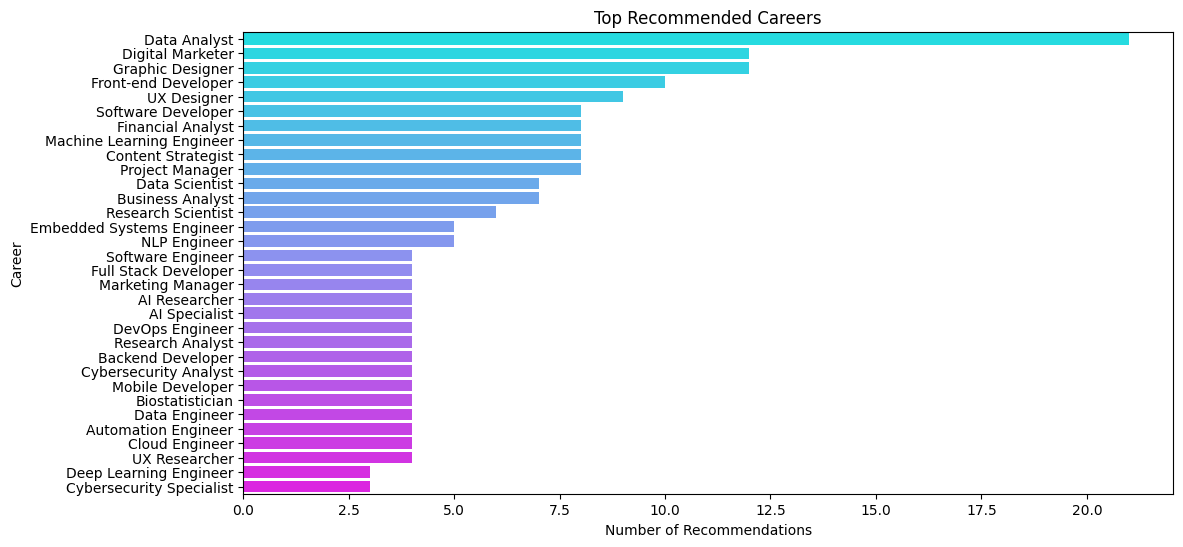

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Recommended_Career', order=df['Recommended_Career'].value_counts().index, palette='cool')
plt.title("Top Recommended Careers")
plt.xlabel("Number of Recommendations")
plt.ylabel("Career")
plt.show()


<ipython-input-54-4f9655e69f92>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Interests', order=df['Interests'].value_counts().index, palette='viridis')


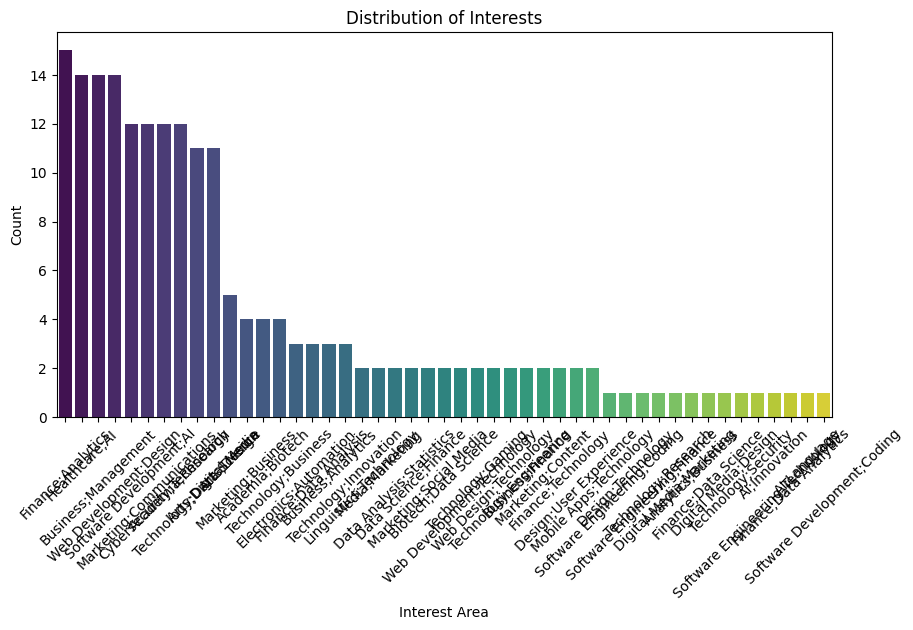

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Interests', order=df['Interests'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title("Distribution of Interests")
plt.ylabel("Count")
plt.xlabel("Interest Area")
plt.show()


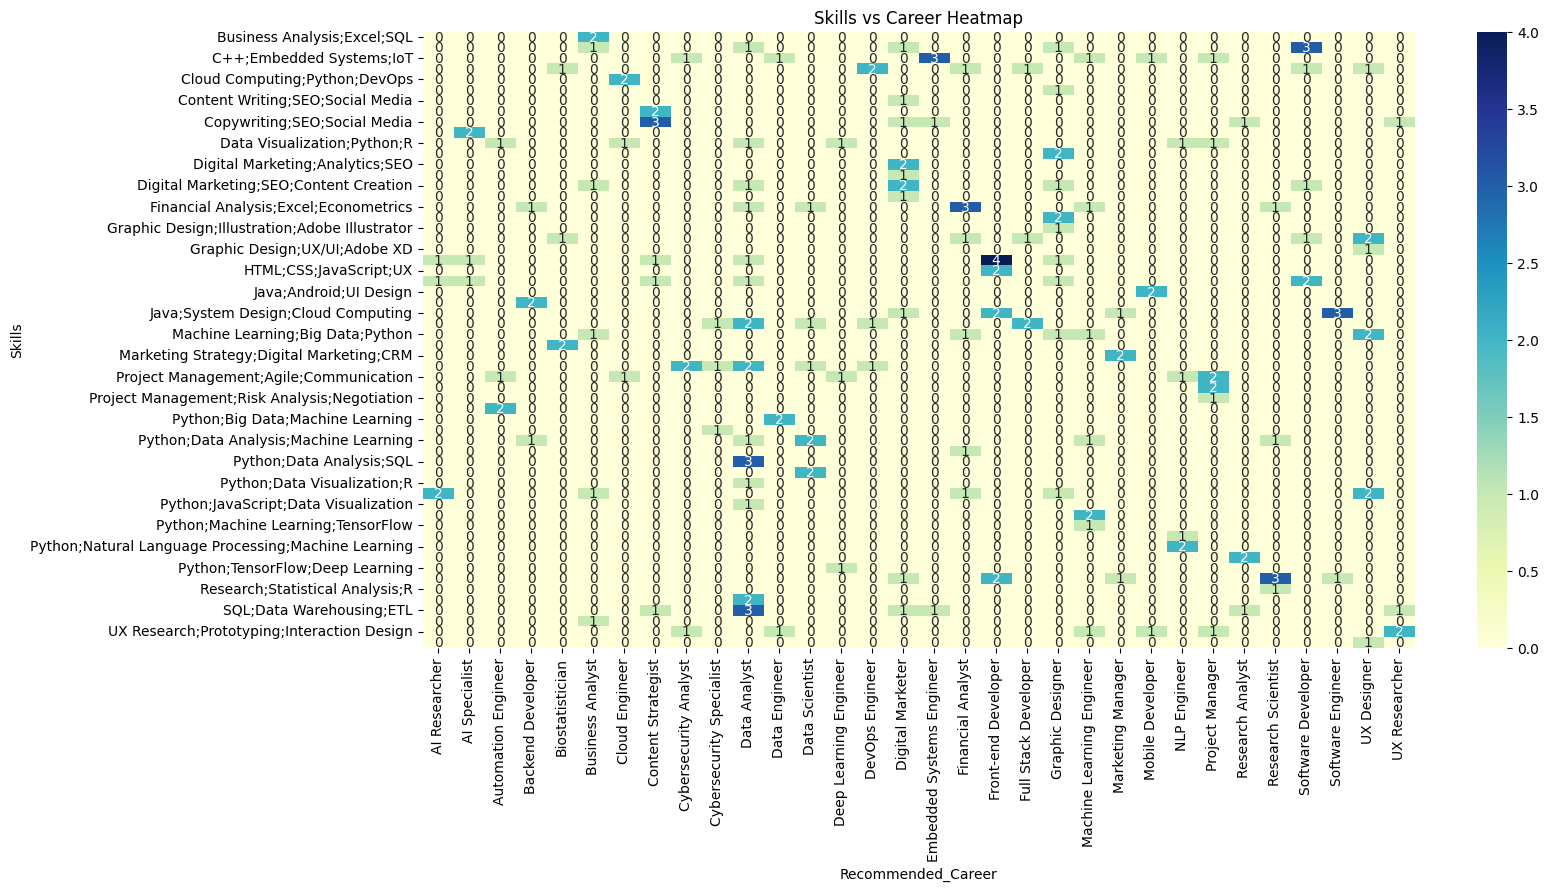

In [ ]:
pivot = pd.crosstab(df['Skills'], df['Recommended_Career'])
plt.figure(figsize=(16,8))
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Skills vs Career Heatmap")
plt.show()


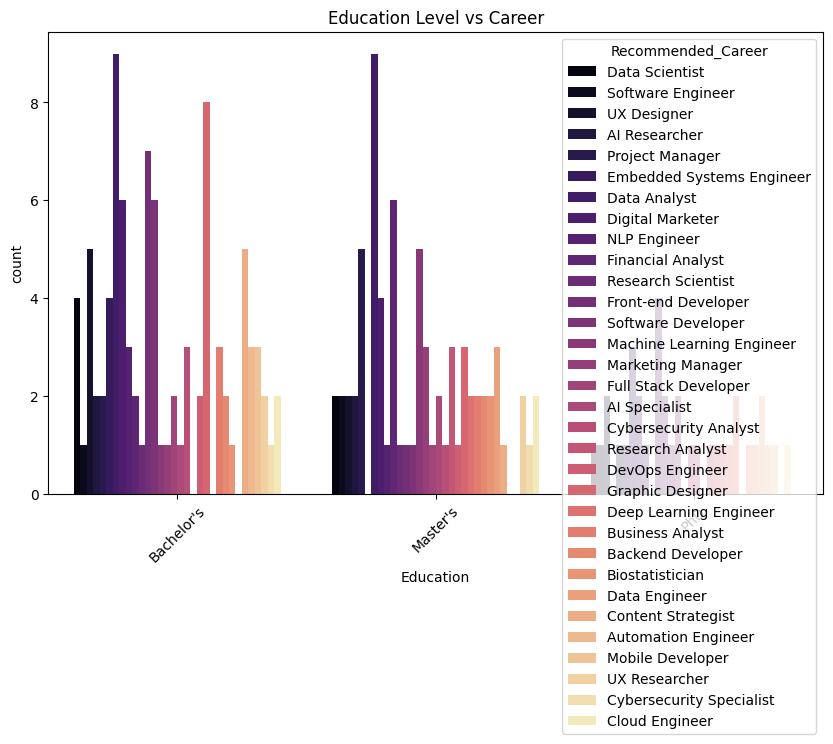

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Education', hue='Recommended_Career', palette='magma')
plt.title("Education Level vs Career")
plt.xticks(rotation=45)
plt.show()


In [ ]:
fig = px.pie(df, names='Interests', title='User Interests Distribution', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()


In [ ]:
import plotly.graph_objects as go

skills = list(df['Skills'].unique())
interests = list(df['Interests'].unique())
careers = list(df['Recommended_Career'].unique())

labels = skills + interests + careers

# Map labels to indices
skill_indices = list(range(len(skills)))
interest_indices = list(range(len(skills), len(skills) + len(interests)))
career_indices = list(range(len(skills) + len(interests), len(labels)))

# Sample links (generate from data)
source = []
target = []
value = []

for _, row in df.iterrows():
    s_idx = skills.index(row['Skills'])
    i_idx = interests.index(row['Interests']) + len(skills)
    c_idx = careers.index(row['Recommended_Career']) + len(skills) + len(interests)

    source += [s_idx, i_idx]
    target += [i_idx, c_idx]
    value += [1, 1]

fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=labels),
    link=dict(source=source, target=target, value=value)
)])

fig.update_layout(title_text="Skills → Interests → Career Map", font_size=10)
fig.show()


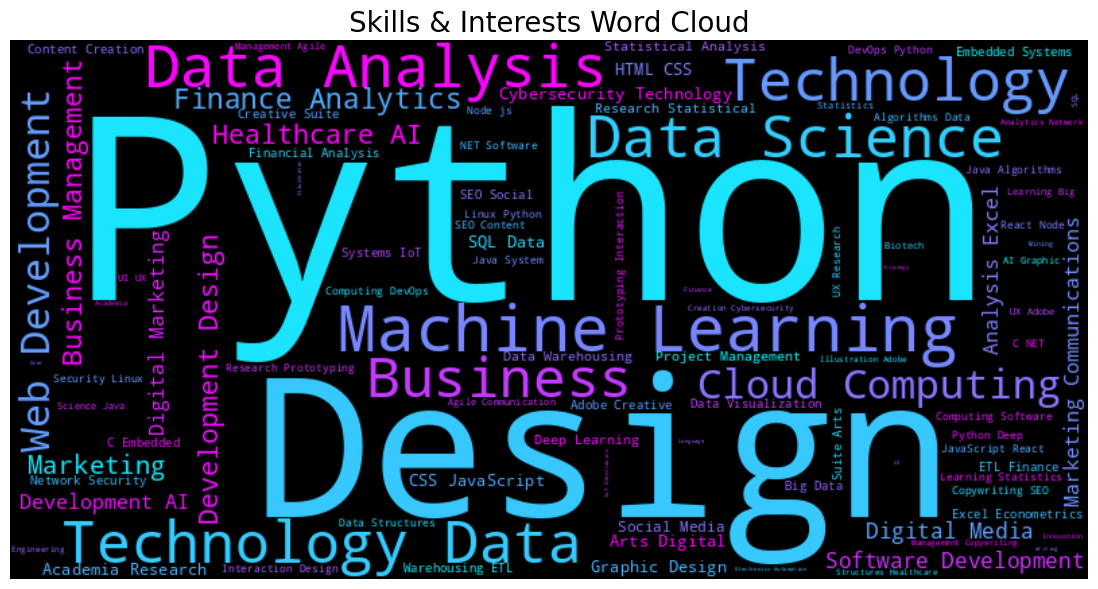

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['Skills'].astype(str) + " " + df['Interests'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='cool').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Skills & Interests Word Cloud", fontsize=20)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

df_encoded = df.copy()
for col in ['Skills', 'Education', 'Recommended_Career']:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

fig = px.scatter_3d(df_encoded, x='Skills', y='Education', z='Recommended_Career',
                    color='Interests', symbol='Interests',
                    title='3D Visualization: Skill vs Education vs Recommended_Career')
fig.show()


In [ ]:
import plotly.graph_objects as go

candidate = df[df['Name'] == 'John Doe'].iloc[0]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=[
        candidate['Recommendation_Score'],
        len(candidate['Skills'].split(';')),
        len(candidate['Interests'].split(';')),
        candidate['Age']
    ],
    theta=['Recommendation Score', 'No. of Skills', 'No. of Interests', 'Age'],
    fill='toself',
    name=candidate['Name']
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, max(df['Age'].max(), 10)])
    ),
    title="🚀 Candidate Profile: Radar Chart",
    showlegend=True
)
fig.show()


<ipython-input-105-0a5bb5e0d238>:8: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



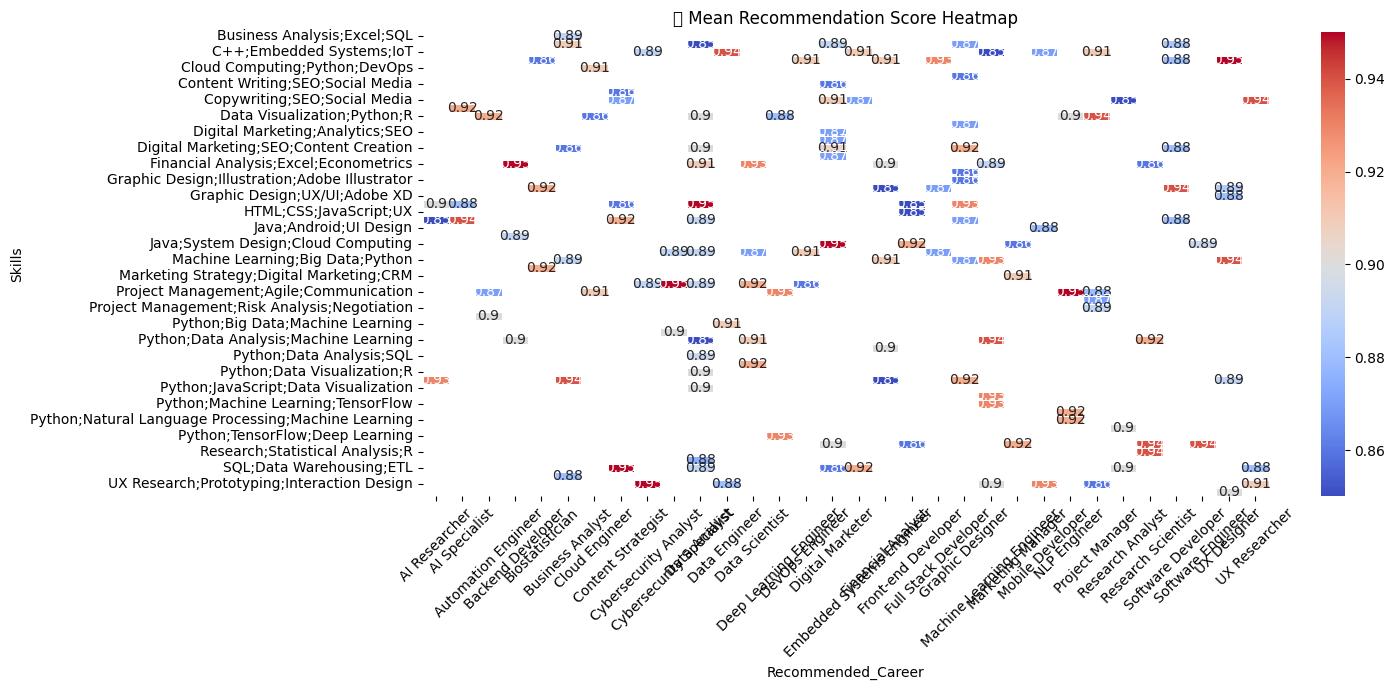

In [ ]:
pivot_score = df.pivot_table(index='Skills', columns='Recommended_Career', values='Recommendation_Score', aggfunc='mean')

plt.figure(figsize=(15, 7))
sns.heatmap(pivot_score, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("🔥 Mean Recommendation Score Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


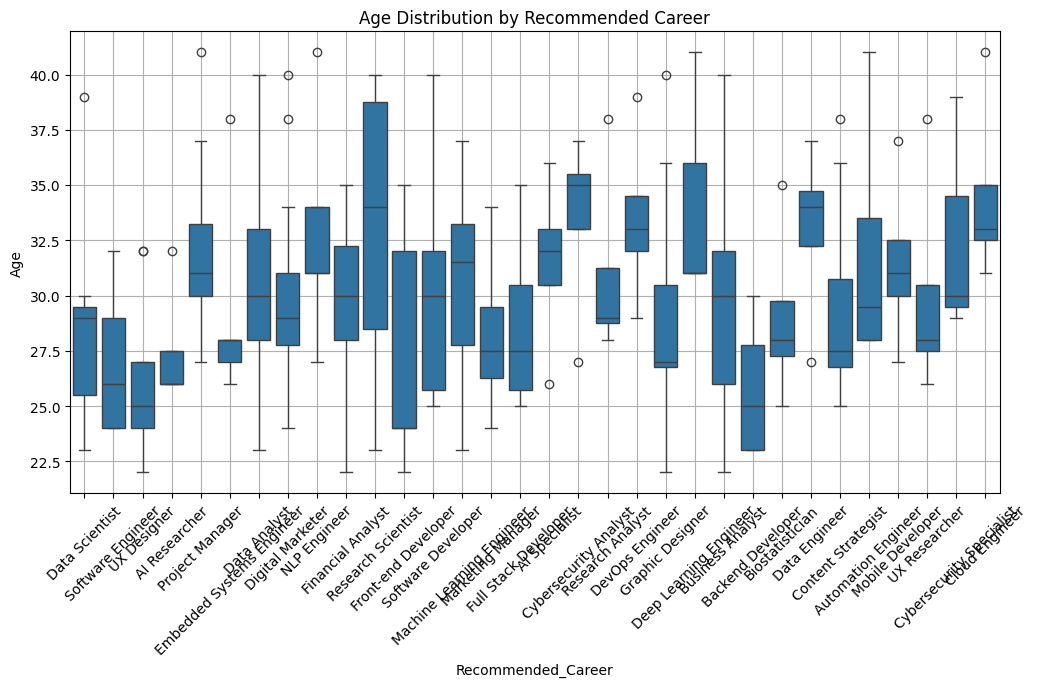

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x='Recommended_Career', y='Age', data=df)
plt.title("Age Distribution by Recommended Career")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import plotly.express as px

# Assume 'df' is the dataframe loaded and cleaned in previous cells
# If you performed cleaning steps that created a *new* dataframe called 'df_clean',
# ensure that variable is defined before this cell.
# Based on the traceback and previous cells, it appears 'df' is the intended variable.
fig = px.sunburst(df, path=['Skills', 'Interests', 'Recommended_Career'],
                  values='Recommendation_Score',
                  color='Recommendation_Score', template='plotly_dark',
                  title='Sunburst: Skills → Interests → Career')
fig.show()

In [ ]:
fig = px.treemap(df, # Changed from df_clean to df
                 path=['Recommended_Career', 'Skills'],
                 values='Recommendation_Score',
                 color='Recommendation_Score',
                 color_continuous_scale='turbo',
                 title="Career Treemap based on Skills & Score")
fig.show()

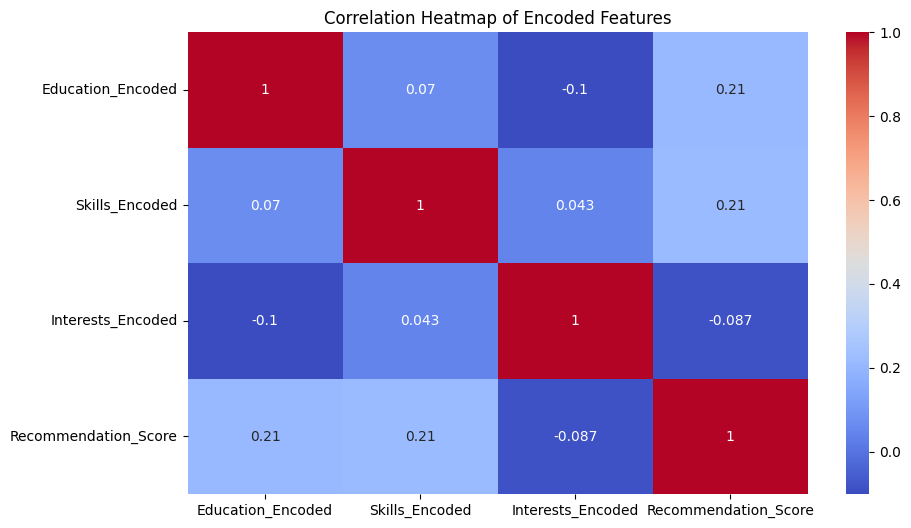

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Assuming df is the dataframe loaded and potentially cleaned in previous cells
# Ensure you are working with the correct dataframe loaded from the CSV

# Re-apply Label Encoding to categorical columns for correlation calculation
# We need new encoders here as the original ones might be out of scope or reset
le_edu_corr = LabelEncoder()
le_skill_corr = LabelEncoder()
le_interest_corr = LabelEncoder()

# Ensure the columns exist before encoding
if 'Education' in df.columns:
    df['Education_Encoded'] = le_edu_corr.fit_transform(df['Education'])
else:
    print("Warning: 'Education' column not found for encoding.")
    # Handle missing column appropriately

if 'Skills' in df.columns:
    df['Skills_Encoded'] = le_skill_corr.fit_transform(df['Skills'])
else:
    print("Warning: 'Skills' column not found for encoding.")

if 'Interests' in df.columns:
    df['Interests_Encoded'] = le_interest_corr.fit_transform(df['Interests'])
else:
    print("Warning: 'Interests' column not found for encoding.")
    # Handle missing column appropriately


if 'Recommendation_Score' not in df.columns:
    print("Error: 'Recommendation_Score' column not found in the dataframe.")

else:
    plt.figure(figsize=(10, 6))

    # Use the encoded columns for correlation along with Recommendation_Score
    # Only include columns that exist and are expected to be numerical (encoded or originally numerical)
    cols_to_correlate = []
    if 'Education_Encoded' in df.columns:
        cols_to_correlate.append('Education_Encoded')
    if 'Skills_Encoded' in df.columns:
        cols_to_correlate.append('Skills_Encoded')
    if 'Interests_Encoded' in df.columns:
        cols_to_correlate.append('Interests_Encoded')
    if 'Recommendation_Score' in df.columns: # Ensure this column exists
         cols_to_correlate.append('Recommendation_Score')


    if cols_to_correlate: # Check if there are columns to correlate
        sns.heatmap(df[cols_to_correlate].corr(), annot=True, cmap='coolwarm')
        plt.title("Correlation Heatmap of Encoded Features")
        plt.show()
    else:
        print("Error: No valid numerical columns found for correlation after encoding.")

In [ ]:
import plotly.graph_objects as go

# Prepare Sankey data: Education -> Skills -> Recommended Career
# We'll use top 10 skills and careers to keep it readable

# Explode skills for counting
df_exp_skills = df.explode('Skills')
df_exp_skills['Skills'] = df_exp_skills['Skills'].str.strip()

# Count connections Education -> Skills
edu_skill_counts = df_exp_skills.groupby(['Education', 'Skills']).size().reset_index(name='count')

# Count connections Skills -> Recommended_Career
skill_career_counts = df_exp_skills.groupby(['Skills', 'Recommended_Career']).size().reset_index(name='count')

# Build node list (unique education + skills + careers)
education_nodes = list(df['Education'].unique())
skill_nodes = list(df_exp_skills['Skills'].unique())
career_nodes = list(df['Recommended_Career'].unique())

all_nodes = education_nodes + skill_nodes + career_nodes
node_indices = {node: i for i, node in enumerate(all_nodes)}

# Sankey links for Education -> Skills
links_edu_skill = dict(
    source=[node_indices[edu] for edu in edu_skill_counts['Education']],
    target=[node_indices[skill] for skill in edu_skill_counts['Skills']],
    value=edu_skill_counts['count']
)

# Sankey links for Skills -> Career
links_skill_career = dict(
    source=[node_indices[skill] for skill in skill_career_counts['Skills']],
    target=[node_indices[career] for career in skill_career_counts['Recommended_Career']],
    value=skill_career_counts['count']
)

# Combine links
sources = links_edu_skill['source'] + links_skill_career['source']
targets = links_edu_skill['target'] + links_skill_career['target']
values = links_edu_skill['value'] + links_skill_career['value']

# Build sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color=["#636EFA"]*len(education_nodes) + ["#EF553B"]*len(skill_nodes) + ["#00CC96"]*len(career_nodes)
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    ))])

fig.update_layout(title_text="Education to Skills to Career Sankey Diagram", font_size=12)
fig.show()


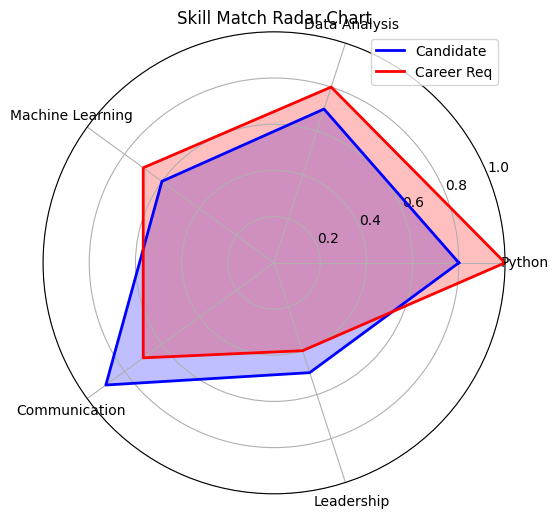

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example candidate profile (normalized scores 0-1)
candidate_profile = {
    'Python': 0.8,
    'Data Analysis': 0.7,
    'Machine Learning': 0.6,
    'Communication': 0.9,
    'Leadership': 0.5
}

# Example career skill requirements (normalized)
career_requirements = {
    'Python': 1.0,
    'Data Analysis': 0.8,
    'Machine Learning': 0.7,
    'Communication': 0.7,
    'Leadership': 0.4
}

labels = list(candidate_profile.keys())
candidate_values = list(candidate_profile.values())
career_values = list(career_requirements.values())

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
candidate_values += candidate_values[:1]
career_values += career_values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

ax.plot(angles, candidate_values, color='blue', linewidth=2, label='Candidate')
ax.fill(angles, candidate_values, color='blue', alpha=0.25)

ax.plot(angles, career_values, color='red', linewidth=2, label='Career Req')
ax.fill(angles, career_values, color='red', alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0,1)
plt.title('Skill Match Radar Chart')
plt.legend(loc='upper right')
plt.show()


<ipython-input-127-4be0703bbeb0>:22: FutureWarning:

The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.



<Figure size 1200x1000 with 0 Axes>

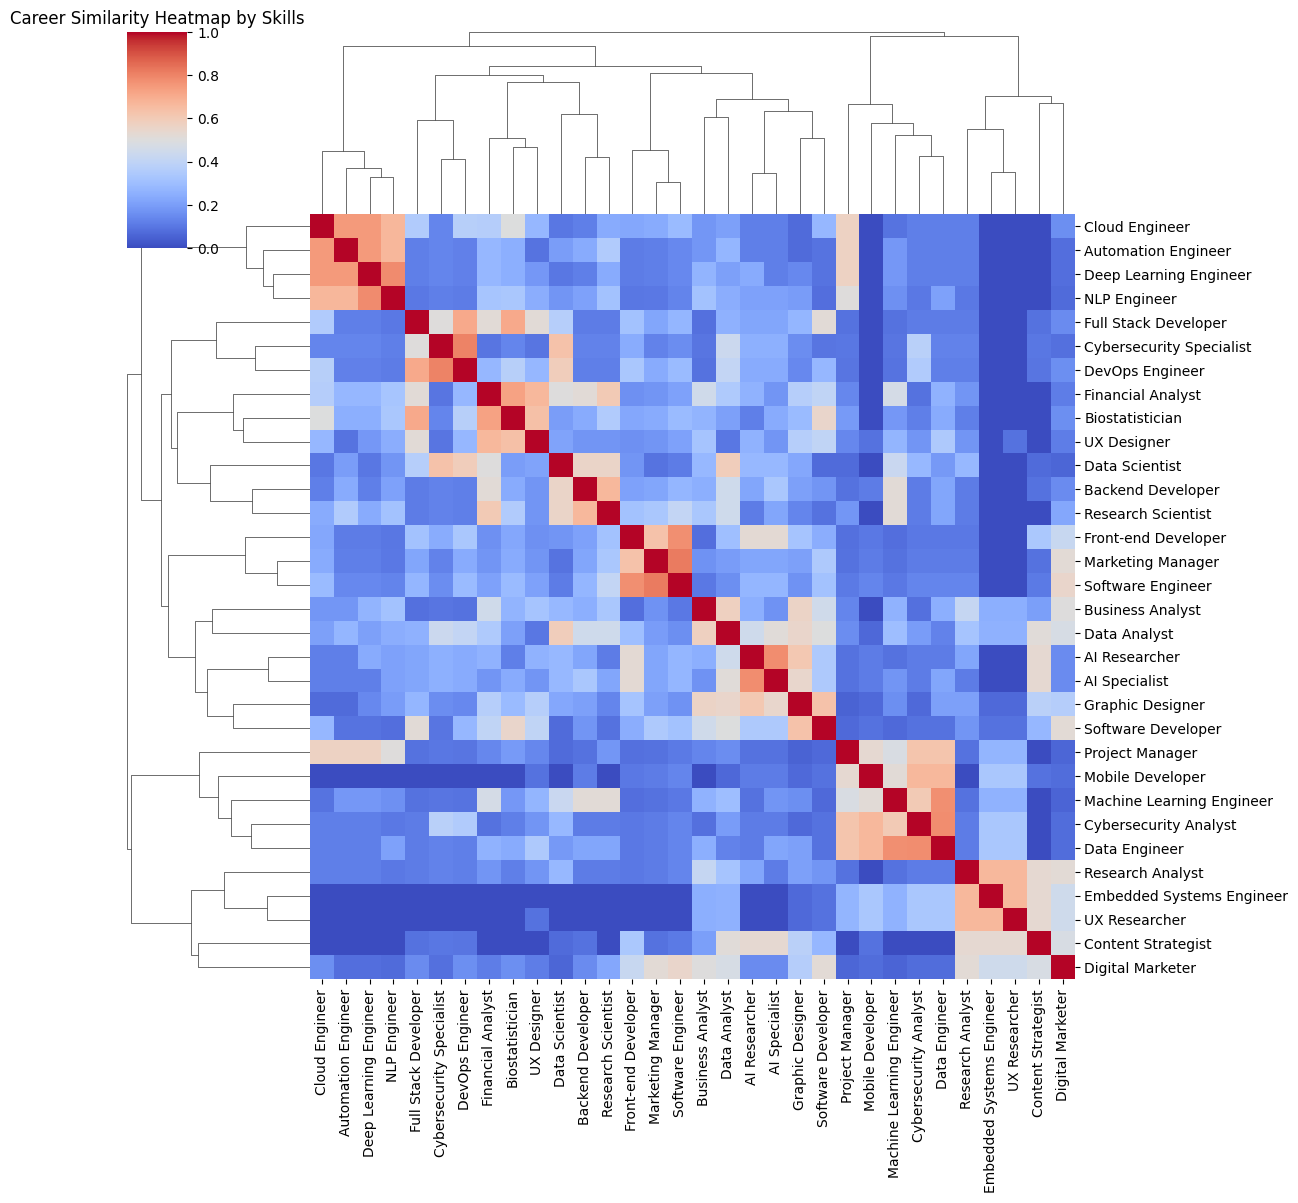

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer # Import MultiLabelBinarizer

# Assuming df is the dataframe loaded and potentially cleaned in previous cells
# Ensure you are working with the correct dataframe loaded from the CSV

# --- FIX: Split the 'Skills' string into a list of skills per row ---
# Ensure the 'Skills' column exists and is not already a list (check dtype or sample values if unsure)
if 'Skills' in df.columns:
    # Assume skills are separated by ';' and remove leading/trailing whitespace
    df['Skills_List'] = df['Skills'].str.split(';').apply(lambda x: [item.strip() for item in x])
else:
    print("Error: 'Skills' column not found for processing.")
    # Handle missing column appropriately


# Aggregate skills by career using the new list column
# Now sum() will correctly concatenate the lists within each group
if 'Recommended_Career' in df.columns and 'Skills_List' in df.columns:
    career_skills = df.groupby('Recommended_Career')['Skills_List'].apply(sum)
else:
    print("Error: 'Recommended_Career' or 'Skills_List' column not found for aggregation.")
    # Handle missing columns appropriately


# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Binarize skills for each career
# Check if career_skills was successfully created
if 'career_skills' in locals():
    # Get all unique skills across all careers for fitting
    all_unique_skills = list(set([skill for sublist in career_skills.tolist() for skill in sublist]))
    mlb.fit(career_skills) # Fit the binarizer on the aggregated lists

    career_skill_matrix = mlb.transform(career_skills)

    # Calculate cosine similarity matrix
    from sklearn.metrics.pairwise import cosine_similarity # Import cosine_similarity
    sim_matrix = cosine_similarity(career_skill_matrix)

    # Plot clustered heatmap
    plt.figure(figsize=(12,10))
    sns.clustermap(sim_matrix, xticklabels=career_skills.index, yticklabels=career_skills.index,
                   cmap='coolwarm', figsize=(12,12))
    plt.title('Career Similarity Heatmap by Skills')
    plt.show()
else:
    print("Could not proceed with heatmap as career_skills was not successfully created.")

# The correlation heatmap section from the previous cell is not directly related
# to this error, but if you intend to keep it in this block, ensure the label encoding
# for correlation is also handled correctly, as shown in the previous failed cell's code.
# However, for just fixing the cosine similarity heatmap, the above changes are sufficient.